In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
import pandas as pd

from matplotlib import colors

In [29]:



csv_file_path = '../merged.csv'

# Create an empty DataFrame
df = pd.DataFrame(columns=['Protein_sequence'])

with open(csv_file_path, 'r') as csv_file:
    csv_reader = csv.DictReader(csv_file)

    for row in csv_reader:
        protein_sequence = row['Protein_sequence']

        # Append the row to the DataFrame
        df = df.append({'Protein_sequence': protein_sequence}, ignore_index=True)




/var/folders/4y/v3q6y9f944zdq449g3spqldm0000gn/T/ipykernel_46795/1533890479.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Protein_sequence': protein_sequence}, ignore_index=True)
/var/folders/4y/v3q6y9f944zdq449g3spqldm0000gn/T/ipykernel_46795/1533890479.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Protein_sequence': protein_sequence}, ignore_index=True)
/var/folders/4y/v3q6y9f944zdq449g3spqldm0000gn/T/ipykernel_46795/1533890479.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Protein_sequence': protein_sequence}, ignore_index=True)
/var/folders/4y/v3q6y9f944zdq449g3spqldm0000gn/T/ipykernel_46795/1533890479.py:13: FutureWarning: The frame.append method is

In [30]:
# Display the DataFrame (optional)
print(df)
Sequence=df['Protein_sequence']

                                       Protein_sequence
0     MSSALLPLAILVEFGGGFLVLIGLQTRLAAFLLFGFSLVAAVLFHS...
1     MKKADIVVLLLDPKDLKAILAPLKKWLADKTIVSMMAGVNIQQLTS...
2     MSCTEKNNIGPSVLSPKNSEQYEVGVKQQIRNFLVTAAIFDLKQDN...
3     MSCTEKNNIGPSVLSPKNSEQYEVGVKQQIRNFLVTAAIFDLKQDN...
4     MLTNLREQWFSNVRADILSGLVVGLALIPEAIAFSIIAGVDPQIGL...
...                                                 ...
7777  MGVACGEANIHPNMELAINPGQVFGHIDGEATRDPAFGLDAVWIME...
7778  MGYRVVDDTLERVWFRYPDTVVGTDALVRPILTGVEKLAFRFYSDK...
7779  MGYRVVDDTLERVWFRYPDTVVGTDALVRPILTGVEKLAFRFYSDK...
7780  MALTRLIVKDFRNIEACDLTLSSGFNFLVGANGSGKTSVLEAIHFL...
7781  MRILISNDDGIFAEGINTLARVLSELGEVTVVAPDRNRSGASNSLS...

[7782 rows x 1 columns]


In [31]:
print(Sequence)

0       MSSALLPLAILVEFGGGFLVLIGLQTRLAAFLLFGFSLVAAVLFHS...
1       MKKADIVVLLLDPKDLKAILAPLKKWLADKTIVSMMAGVNIQQLTS...
2       MSCTEKNNIGPSVLSPKNSEQYEVGVKQQIRNFLVTAAIFDLKQDN...
3       MSCTEKNNIGPSVLSPKNSEQYEVGVKQQIRNFLVTAAIFDLKQDN...
4       MLTNLREQWFSNVRADILSGLVVGLALIPEAIAFSIIAGVDPQIGL...
                              ...                        
7777    MGVACGEANIHPNMELAINPGQVFGHIDGEATRDPAFGLDAVWIME...
7778    MGYRVVDDTLERVWFRYPDTVVGTDALVRPILTGVEKLAFRFYSDK...
7779    MGYRVVDDTLERVWFRYPDTVVGTDALVRPILTGVEKLAFRFYSDK...
7780    MALTRLIVKDFRNIEACDLTLSSGFNFLVGANGSGKTSVLEAIHFL...
7781    MRILISNDDGIFAEGINTLARVLSELGEVTVVAPDRNRSGASNSLS...
Name: Protein_sequence, Length: 7782, dtype: object


In [32]:
def AnalyticsCalculations(Sequence):

    count_aminos = {}
    length_seqs = []
    for i, seq in enumerate(Sequence):
        length_seqs.append(len(seq))
        for a in seq:
            if a in count_aminos:
                count_aminos[a] += 1
            else:
                count_aminos[a] = 0

    return count_aminos, length_seqs



In [33]:
def SequenceAnalytics(Sequence):

    count_aminos = {}
    length_seqs = []

    count_aminos, length_seqs = AnalyticsCalculations(Sequence)
     
    unique_aminos = list(count_aminos.keys())


    print('---------------------------------Amino Acids Analytics-------------------------------------')

    print('Unique aminos ({}):\n{}'.format(len(unique_aminos), unique_aminos))
    x = [i for i in range(len(unique_aminos))]
    plt.bar(x, count_aminos.values())
    plt.xticks(x, unique_aminos)
    print(list(count_aminos.values())[-5:])
    plt.show()

    print('Average length:', np.mean(length_seqs))
    print('Deviation:', np.std(length_seqs))
    print('Min length:', np.min(length_seqs))
    print('Max length:', np.max(length_seqs))

    print('Average length:', np.mean(length_seqs))
    print('Deviation:', np.std(length_seqs))
    print('Min length:', np.min(length_seqs))
    print('Max length:', np.max(length_seqs))

    return length_seqs

In [45]:
def histogram(Sequence):
    length_seqs = []

    print('---------------------------------Sequence Length Distribution-------------------------------------')

    count_aminos, length_seqs = AnalyticsCalculations(Sequence)
    sorted_seqs = np.array(length_seqs)
    sorted_seqs.sort()
    print('10 shortest:\n{}\n10 longest:\n{}'.format(sorted_seqs[:10], sorted_seqs[-10:]))

    print("Number of Sequences: ", Sequence.size)
    print('Number sequences less than 30 AA:', len(sorted_seqs[sorted_seqs < 30]))
    print('Number sequences more than 500 AA:', len(sorted_seqs[sorted_seqs > 500]))
    print('Number sequences more than 1000 AA:', len(sorted_seqs[sorted_seqs > 1000]))

    Optimized_length_seq = length_seqs

    # for item in length_seqs:
    #     if (item < 1000):
    #         Optimized_length_seq.append(item)

    N_points = 10000
    n_bins = 200
    legend = ['distribution']

    fig, axs = plt.subplots(1, 1, figsize=(10, 7), tight_layout=True)

    # Remove axes splines
    for s in ['top', 'bottom', 'left', 'right']:
        axs.spines[s].set_visible(False)

    # Remove x, y ticks
    axs.xaxis.set_ticks_position('none')
    axs.yaxis.set_ticks_position('none')

    # Add padding between axes and labels
    axs.xaxis.set_tick_params(pad=5)
    axs.yaxis.set_tick_params(pad=10)

    # Add x, y gridlines
    axs.grid(True, linestyle='-.', linewidth=0.5, alpha=0.6, color='grey')


    # Add Text watermark
    fig.text(0.9, 0.15, 'Exploring_the_Protein_Universe',
             fontsize=12, color='red',
             ha='right', va='bottom', alpha=0.7)

    # Creating histogram
    N, bins, patches = axs.hist(Optimized_length_seq, bins=n_bins)

    # Setting color
    fracs = ((N ** (1 / 5)) / N.max())
    norm = colors.Normalize(fracs.min(), fracs.max())

    for thisfrac, thispatch in zip(fracs, patches):
        color = plt.cm.viridis(norm(thisfrac))
        thispatch.set_facecolor(color)

    # Adding extra features
    plt.xlabel("Sequence Length")
    plt.ylabel("Number of Sequences")
    plt.legend(legend)
    plt.title('Sequence Length Distribution')

    # Show plot
    plt.show()

---------------------------------Amino Acids Analytics-------------------------------------
Unique aminos (21):
['M', 'S', 'A', 'L', 'P', 'I', 'V', 'E', 'F', 'G', 'Q', 'T', 'R', 'H', 'D', 'N', 'K', 'W', 'Y', 'C', 'X']
[102177, 36594, 78035, 25565, 730]


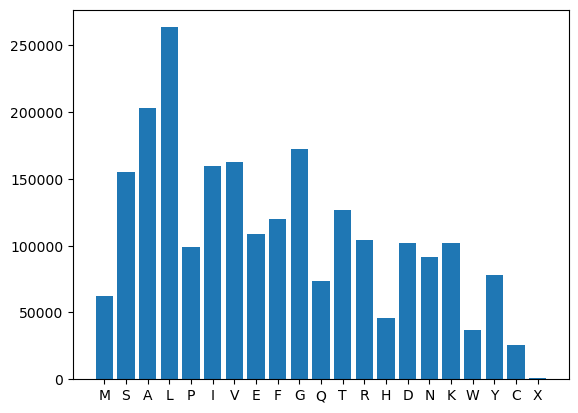

Average length: 294.5566692367001
Deviation: 228.10221327388618
Min length: 30
Max length: 4888
Average length: 294.5566692367001
Deviation: 228.10221327388618
Min length: 30
Max length: 4888
---------------------------------Sequence Length Distribution-------------------------------------
10 shortest:
[30 30 31 31 31 31 31 31 31 31]
10 longest:
[2905 2908 2908 3055 3055 3328 3476 3659 3659 4888]
Number of Sequences:  7782
Number sequences less than 30 AA: 0
Number sequences more than 500 AA: 719
Number sequences more than 1000 AA: 93


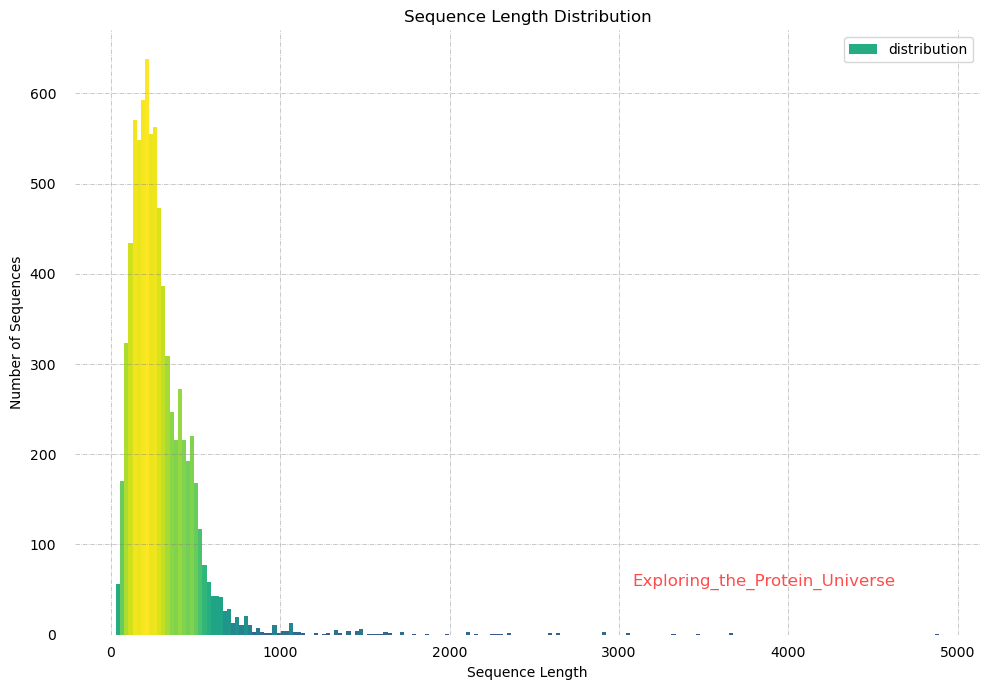

In [46]:

SequenceAnalytics(Sequence)
histogram(Sequence)
